In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
import sklearn.model_selection as skm 
from sklearn.metrics import roc_auc_score

In [26]:
#ramki danych do licencjata
import os

folder_path = "C:/Users/Nitro/Desktop/rzeczy na studia/licencjat/zbiorydanychLIC"

csv_data_list = []

#zgranie wszystkich plików csv z folderu do listy
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        csv_data_list.append(pd.read_csv(file_path))

In [27]:
#zmiana nazwy kolumny class na Class
for idx, i in enumerate(csv_data_list):
    if "class" in i.columns:
        csv_data_list[idx] = i.rename(columns={"class": "Class"})
#rozbicie listy na macierz, gdzie każdy wiersz to zbiór danych a kolumny to metoda preprocessingu
M = [[] for _ in range(1,11)]
k = 0
for j in range(len(M)):
    for i in range(1,36):
        M[j].append(csv_data_list[k])
        k += 1 

In [ ]:
#kroswalidacja i randomsearch
wynikitrain = [[] for _ in range(1,11)]
wynikitest = [[] for _ in range(1,11)]
for i in range(len(M)):
    for j in range(len(M[0])):
        M[i][j] = pd.get_dummies(M[i][j], dtype = 'int64')
        X = M[i][j].drop('Class', axis=1)
        y = M[i][j].Class
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
        model = ExtraTreesClassifier(random_state=420)
        kfold = skm.KFold(5, shuffle=True)
        wynikitrain[i].append(round(cross_val_score(model, X_train, y_train, cv = kfold, scoring = "roc_auc").mean(), 3))
        randsearch = skm.RandomizedSearchCV(model,
                                            {'n_estimators': [100, 200, 300, 400, 500],
                                            'max_depth': [None, 20, 40, 60, 80, 100],
                                            'min_samples_split': [2, 5, 10],
                                            'max_features': ['auto', 'sqrt', 'log2'],
                                            'criterion': ['gini', 'entropy'],},
                                            n_iter = 20,
                                            scoring = 'roc_auc',
                                            cv = kfold)
        model = randsearch.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        wynikitest[i].append(round(roc_auc, 3))

In [13]:
wynikitrain = np.array(wynikitrain)
wynikitest = np.array(wynikitest)
print("wyniki trening:", "\n")
print(wynikitrain)
print("wyniki test:", "\n")
print(wynikitest)

wyniki trening: 

[[0.998 0.997 0.997 0.998 0.998 0.996 0.998 0.998 0.998 0.998 0.997 0.998
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
 [0.676 0.688 0.688 0.677 0.652 0.65  0.68  0.692 0.691 0.677 0.667 0.679
  0.662 0.66  0.671 0.643 0.644 0.675 0.656 0.713 0.676 0.651 0.67  0.662
  0.657 0.662 0.67  0.667 0.686 0.681 0.66  0.67  0.684 0.658 0.656]
 [0.992 0.993 0.992 0.993 0.992 0.993 0.993 0.993 0.993 0.994 0.992 0.993
  0.993 0.993 0.99  0.994 0.993 0.994 0.995 0.994 0.992 0.993 0.993 0.992
  0.991 0.993 0.994 0.991 0.992 0.993 0.993 0.991 0.991 0.994 0.992]
 [0.908 0.911 0.922 0.911 0.916 0.903 0.908 0.912 0.905 0.903 0.913 0.91
  0.919 0.92  0.913 0.905 0.916 0.918 0.903 0.913 0.912 0.901 0.909 0.914
  0.909 0.921 0.913 0.904 0.912 0.928 0.912 0.912 0.915 0.91  0.909]
 [0.779 0.764 0.792 0.754 0.702 0.779 0.749 0.776 0.684 0.767 0.755 0.762
  0.776 0.753 0.782 0.756 0.725 0.776 0.796 

In [14]:
meanformethodtest = []
for i in range(len(M[0])):
    l = []
    for j in range(0,10):
        l.append(wynikitest[j][i])
    meanformethodtest.append(round(np.mean(l),3))
print("średnie wyniki dla danych metod: \n", meanformethodtest)
print("najlepszy średni wynik: \n", max(meanformethodtest))
print("metoda z najlepszym wynikiem: \n", meanformethodtest.index(max(meanformethodtest)))
print("odchylenie standardowe średnich wyników różnych metod: \n", np.std(meanformethodtest))

średnie wyniki dla danych metod: 
 [0.89, 0.892, 0.892, 0.888, 0.893, 0.888, 0.888, 0.891, 0.886, 0.889, 0.886, 0.891, 0.891, 0.89, 0.892, 0.889, 0.887, 0.888, 0.89, 0.891, 0.887, 0.891, 0.891, 0.89, 0.892, 0.886, 0.887, 0.89, 0.89, 0.889, 0.89, 0.885, 0.889, 0.885, 0.889]
najlepszy średni wynik: 
 0.893
metoda z najlepszym wynikiem: 
 4
odchylenie standardowe średnich wyników różnych metod: 
 0.002112354330202804


In [25]:
wynikitest = pd.DataFrame(wynikitest)

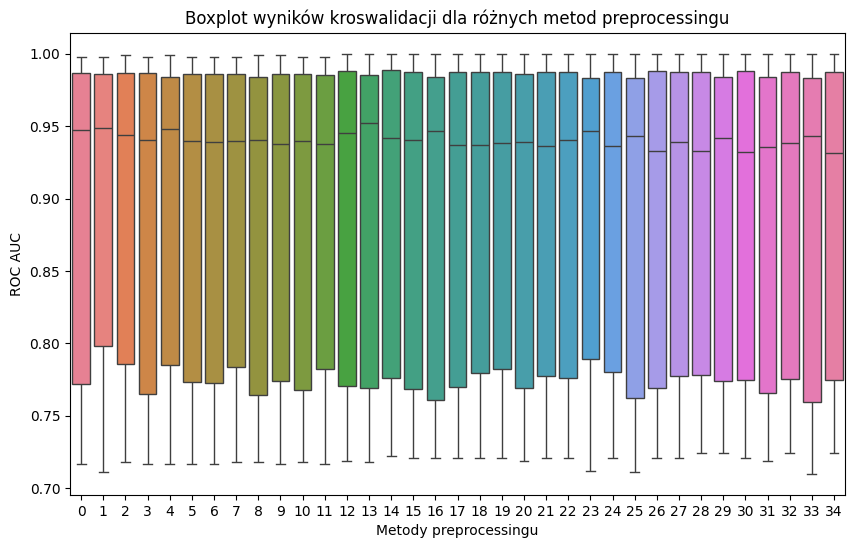

In [37]:
#boxplot wyników dla różnych metod
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=wynikitest)
plt.title("Boxplot wyników kroswalidacji dla różnych metod preprocessingu")
plt.xlabel("Metody preprocessingu")
plt.ylabel("ROC AUC")
plt.show()

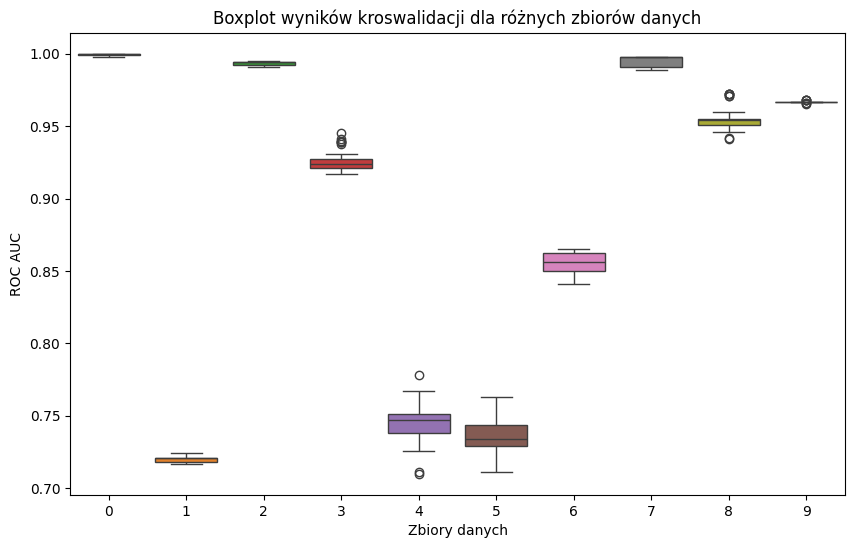

In [36]:
#boxplot wyników dla różnych zbiorów

plt.figure(figsize=(10, 6))
sns.boxplot(data=wynikitest.T)
plt.title("Boxplot wyników kroswalidacji dla różnych zbiorów danych")
plt.xlabel("Zbiory danych")
plt.ylabel("ROC AUC")
plt.show()

In [29]:
#sam model
wynikitrainmodel = [[] for _ in range(1,11)]
wynikitestmodel = [[] for _ in range(1,11)]
for i in range(len(M)):
    for j in range(len(M[0])):
        M[i][j] = pd.get_dummies(M[i][j], dtype = 'int64')
        X = M[i][j].drop('Class', axis=1)
        y = M[i][j].Class
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
        model = ExtraTreesClassifier(random_state=420)
        kfold = skm.KFold(5, shuffle=True)
        wynikitrainmodel[i].append(round(cross_val_score(model, X_train, y_train, cv = kfold, scoring = "roc_auc").mean(), 3))
        model = model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        wynikitestmodel[i].append(round(roc_auc, 3))

In [30]:
wynikitrainmodel = np.array(wynikitrainmodel)
wynikitestmodel = np.array(wynikitestmodel)
print("wyniki trening:", "\n")
print(wynikitrainmodel)
print("wyniki test:", "\n")
print(wynikitestmodel)

wyniki trening: 

[[0.999 0.997 0.998 0.998 0.999 0.996 0.998 0.998 0.998 0.997 0.998 0.999
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
 [0.656 0.683 0.675 0.675 0.675 0.684 0.677 0.703 0.683 0.673 0.654 0.688
  0.677 0.658 0.655 0.658 0.669 0.673 0.658 0.665 0.63  0.649 0.675 0.641
  0.672 0.654 0.646 0.673 0.671 0.655 0.674 0.661 0.672 0.635 0.671]
 [0.994 0.99  0.992 0.99  0.99  0.993 0.992 0.993 0.993 0.991 0.993 0.992
  0.992 0.995 0.993 0.992 0.995 0.995 0.991 0.993 0.991 0.992 0.995 0.994
  0.994 0.993 0.995 0.993 0.992 0.995 0.993 0.995 0.996 0.993 0.993]
 [0.91  0.919 0.919 0.914 0.917 0.91  0.907 0.915 0.91  0.902 0.915 0.919
  0.909 0.92  0.916 0.905 0.922 0.916 0.914 0.918 0.907 0.905 0.912 0.907
  0.913 0.918 0.922 0.907 0.913 0.927 0.91  0.912 0.909 0.917 0.909]
 [0.783 0.74  0.79  0.764 0.723 0.767 0.74  0.78  0.691 0.778 0.755 0.762
  0.773 0.76  0.808 0.767 0.725 0.77  0.768

In [32]:
meanformethodtestmodel = []
for i in range(len(M[0])):
    l = []
    for j in range(0,10):
        l.append(wynikitestmodel[j][i])
    meanformethodtestmodel.append(round(np.mean(l),3))
print("średnie wyniki dla danych metod: \n", meanformethodtestmodel)
print("najlepszy średni wynik: \n", max(meanformethodtestmodel))
print("metoda z najlepszym wynikiem: \n", meanformethodtestmodel.index(max(meanformethodtestmodel)))
print("odchylenie standardowe średnich wyników różnych metod: \n", np.std(meanformethodtestmodel))

średnie wyniki dla danych metod: 
 [0.872, 0.867, 0.875, 0.869, 0.866, 0.87, 0.87, 0.871, 0.862, 0.871, 0.864, 0.871, 0.871, 0.86, 0.872, 0.87, 0.865, 0.868, 0.871, 0.871, 0.862, 0.871, 0.871, 0.863, 0.871, 0.861, 0.867, 0.869, 0.869, 0.865, 0.869, 0.861, 0.872, 0.861, 0.869]
najlepszy średni wynik: 
 0.875
metoda z najlepszym wynikiem: 
 2
odchylenie standardowe średnich wyników różnych metod: 
 0.003937885063776015


In [33]:
wynikitestmodel = pd.DataFrame(wynikitestmodel)

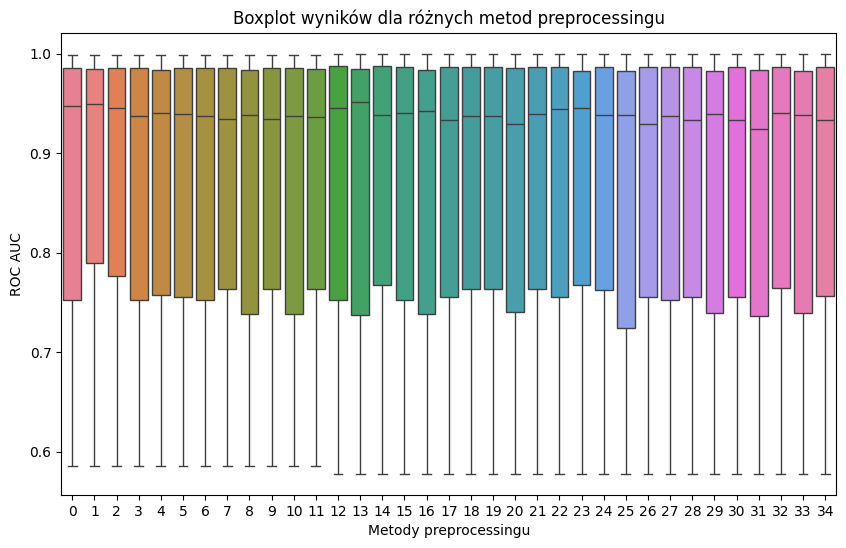

In [34]:
#boxplot wyników dla różnych metod
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=wynikitestmodel)
plt.title("Boxplot wyników dla różnych metod preprocessingu")
plt.xlabel("Metody preprocessingu")
plt.ylabel("ROC AUC")
plt.show()

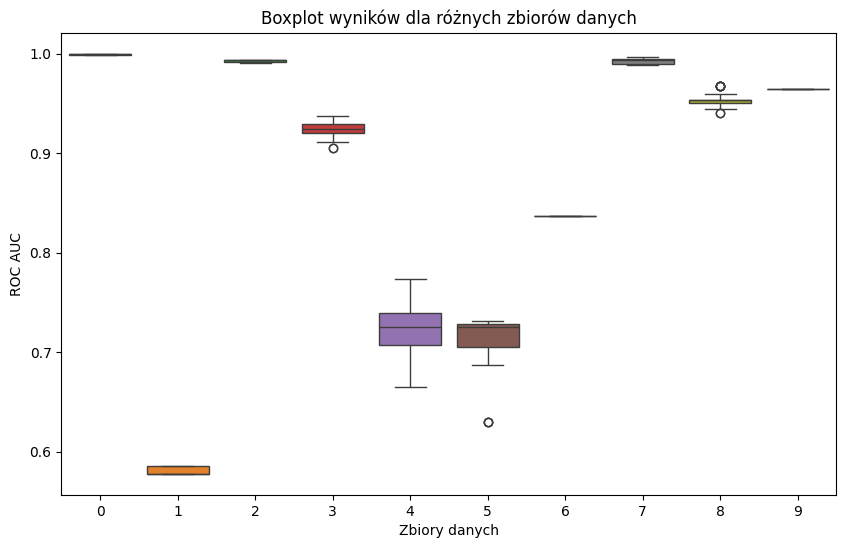

In [35]:
#boxplot wyników dla różnych zbiorów

plt.figure(figsize=(10, 6))
sns.boxplot(data=wynikitestmodel.T)
plt.title("Boxplot wyników dla różnych zbiorów danych")
plt.xlabel("Zbiory danych")
plt.ylabel("ROC AUC")
plt.show()